# Fraud  Loan Prediction

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [19]:
ds=pd.read_csv('loan_prediction.csv')
ds

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
ds.shape

(614, 13)

In [21]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#To check the missing values

In [24]:
ds.isnull().values.any()

True

In [25]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

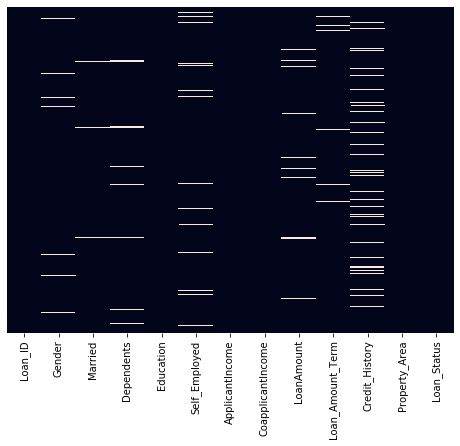

In [26]:
#seeing missing value via visualization
plt.figure(figsize=(8, 6))
sns.heatmap(ds.isnull(),yticklabels=False, cbar=False)

Observation

1.The summary shows that the variables - gender, Married, Dependents, Self_employed contain missing values. These variables are cateorical data type. So I will impute the missing values with the most frequent value i.e mode.

2.Also the variables - loan Amount, Loan_Amount_term, Credit History contains values. These variables are numeric data type . So I will impute missing values with the mean.

# Imputing values in Categorical columns

In [27]:
#Imputing the missing value with mode

for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    ds[col].fillna(ds[col].mode()[0], inplace=True)

In [28]:
ds.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation

Now all the missing values present in categorical columns are imputed.

Imputing Values in Numeric Columns

In [29]:
#Imputing the missig value with their mean

ds['LoanAmount'].fillna(ds['LoanAmount'].mean(),inplace=True)
ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mean(),inplace=True)
ds['Credit_History'].fillna(ds['Credit_History'].mean(),inplace=True)

In [30]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observation

Now all the missing values are imputed. We can see with heatmap

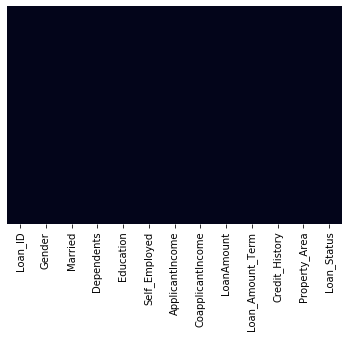

In [31]:
#with the use of heatmap again checking the missing values
sns.heatmap(ds.isnull(),yticklabels=False, cbar=False)

In [32]:
#Checking for any missing values present values present in the dataset
ds.isnull().values.any()

False

# Exploring the categorical columns

In [33]:
#Printing the object datatypes and their unique values

for column in ds.columns:
    if ds[column].dtypes == object:
        print(str(column) + ':' + str(ds[column].unique()))
        print(ds[column].value_counts())
        print('************************************************************************')
        print('\n')

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

Observation

This is the summary of categorical columns.

1.Loan sanction to 422 people

2.Three types of property area mention in our dataset i.e. Urban, Rural and Semiurban.

3.522 people are self employed.

4.Out of 614 people only 480 people are graduated.

For Analyzing the data with target i.e Loan_Status we have to change income into numeric type

In [34]:
#Changing the data type of target variable.

ds['Loan_Status']=ds['Loan_Status'].map({'N' : 0, 'Y' : 1})
ds['Loan_Status'].dtypes

dtype('int64')

In [35]:
ds['Loan_Status'].unique()

array([1, 0], dtype=int64)

Observation

here 1 stands for loan sanction and 0 stands for loan rejected.

# Summary Statistics

In [36]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Observation

1.Applicant maximum income is 81000 and minimun income is 150

2.Coapplicant maximum income is 41667 and minimum income is zero

3.maximum Loan amount is 700 and minimum is 9

4.For applicant income, Coapplication, Loan Amount mean is greater than median thereforre data is skewed for these attributes.

5.For loan_amount_term, Credit_History, Loan_Status median is greater than mean therefore data is left skewed for these attributes.

6.The difference between 75% and maximum is higher in applicant income, Coapplication, Loan Amount, Loan Amount term columns therefore outliers are present in these columns.

# To Check Correlation

In [37]:
ds_cor=ds.corr()
ds_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000


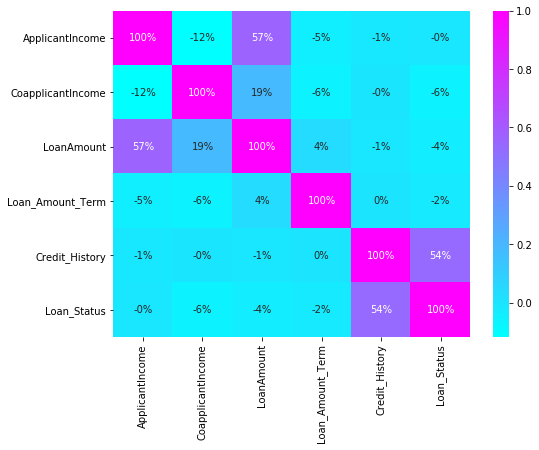

In [38]:
#Correlation via heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(ds_cor, annot=True, fmt='.0%', cmap='cool')
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable')

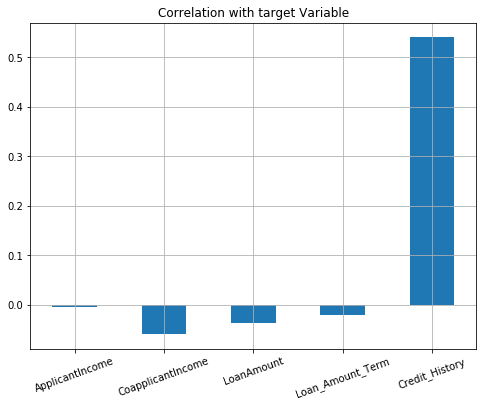

In [39]:
#Checking the correlation with target variable
plt.figure(figsize=(8,6))
ds.drop('Loan_Status', axis=1).corrwith(ds['Loan_Status']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target Variable")

Observation

1.Loan status is highly correlated with Credit history

2.Loan amount term is highly correlated with Applicant Income

# Data Visualization

Our feature variable of interest in Loan_Status

It refers to the loan sanction

we already change it integer valued as it contains only two number 0 and 1

1 stands for Loan Sanction

0 stands for loan not pass

# Univariate Anlysis

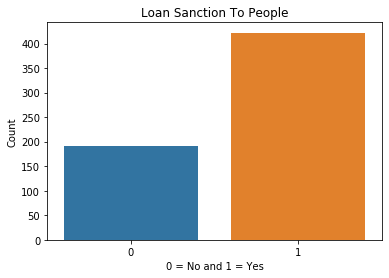

1    422
0    192
Name: Loan_Status, dtype: int64


In [40]:
#Checking the loan Sanction
plt.subplots(figsize=(6,4))
sns.countplot(x="Loan_Status", data=ds)
plt.title("Loan Sanction To People")
plt.xlabel('0 = No and 1 = Yes')
plt.ylabel("Count")
plt.show()

print(ds.Loan_Status.value_counts())

Observation

1. 422 people get loan.

2. 192 people did not get loan.

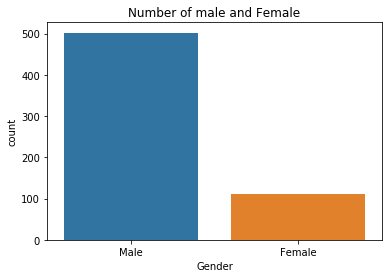

Male      502
Female    112
Name: Gender, dtype: int64


In [41]:
#Checking gender

plt.subplots(figsize=(6,4))
sns.countplot(x="Gender", data=ds)
plt.title("Number of male and Female")
plt.show()

print(ds.Gender.value_counts())

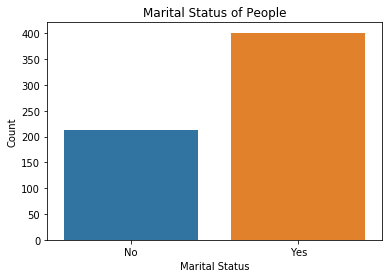

Yes    401
No     213
Name: Married, dtype: int64


In [42]:
#Checking marital status

plt.subplots(figsize=(6,4))
sns.countplot(x="Married", data=ds)
plt.title("Marital Status of People")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

print(ds.Married.value_counts())

Observation

1. 401 people are marrried out of 614 people.

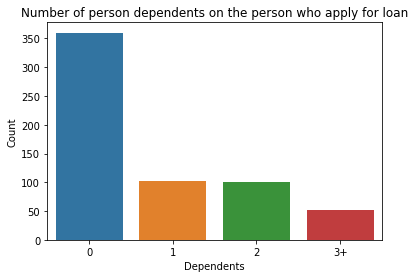

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [43]:
#Checking the number of person dependents on the person who apply for loan
plt.subplots(figsize=(6,4))
sns.countplot(x="Dependents", data=ds)
plt.title("Number of person dependents on the person who apply for loan")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

print(ds.Dependents.value_counts())

Observation:
    
1 - Out of 614 person, 360 person have no dependents

2 - 51 people have 3+ dependents

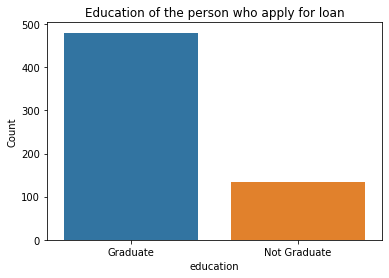

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


In [44]:
#Checking the Education of the person who apply for loan
plt.subplots(figsize=(6,4))
sns.countplot(x="Education", data=ds)
plt.title("Education of the person who apply for loan")
plt.xlabel('education')
plt.ylabel("Count")
plt.show()

print(ds.Education.value_counts())

Observation

Out of 614, 480 people have done Graduation.

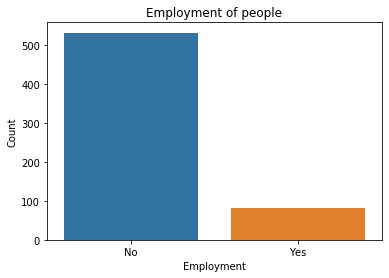

No     532
Yes     82
Name: Self_Employed, dtype: int64


In [45]:
#Checking the employment of the person who apply for loan
plt.subplots(figsize=(6,4))
sns.countplot(x="Self_Employed", data=ds)
plt.title("Employment of people")
plt.xlabel("Employment")
plt.ylabel("Count")
plt.show()

print(ds.Self_Employed.value_counts())

Observation

1 - only 82 person out of 614 are self emplyed.

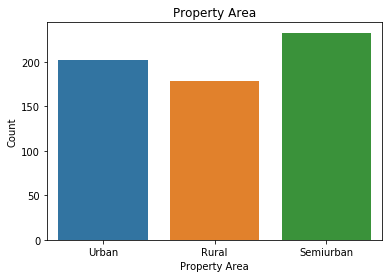

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [46]:
#checking property Area of the person who apply for loan

plt.subplots(figsize=(6, 4))
sns.countplot(x="Property_Area", data=ds)
plt.title("Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

print(ds.Property_Area.value_counts())

Observations

233 have property area in Semiurban

202 have property in Urban area

179 have property in Rural Area

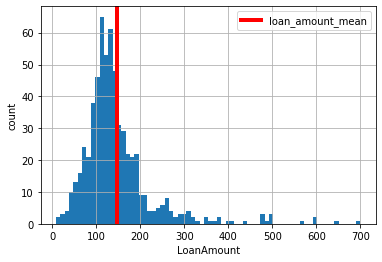

146.41216216216213


In [47]:
#Chcking the mean of loan_Amount
loan_amount=ds['LoanAmount'].hist(bins=70)
mean_val=np.mean(ds["LoanAmount"])
plt.axvline(mean_val, linewidth=4, color='red', label='loan_amount_mean')
plt.xlabel('LoanAmount')
plt.ylabel('count')
plt.legend()
plt.show()

print(mean_val)

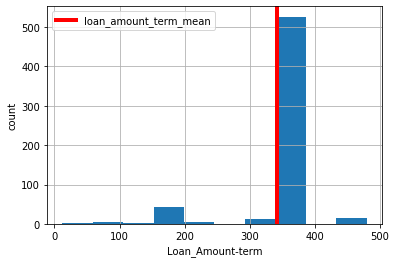

In [48]:
#Checking the mean of loan amount term

loan_amount = ds['Loan_Amount_Term'].hist()
mean_val=np.mean(ds['Loan_Amount_Term'])
plt.axvline(mean_val, linewidth=4, color='red', label='loan_amount_term_mean')
plt.xlabel('Loan_Amount-term')
plt.ylabel('count')
plt.legend()
plt.show()

# Bivariate Analysis

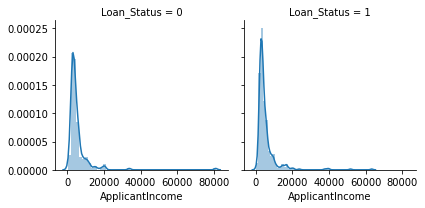

In [49]:
#Exploring App;licant income vs Loan_Status via FaceGrid

facet=sns.FacetGrid(ds, col='Loan_Status')
facet.map(sns.distplot, "ApplicantIncome")
plt.show()

# Gender vs Loan Status

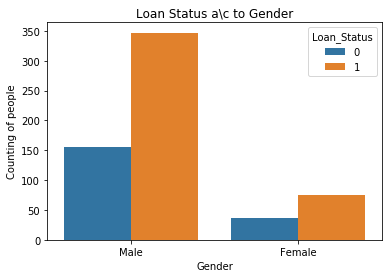

Gender  Loan_Status
Female  1               75
        0               37
Male    1              347
        0              155
Name: Loan_Status, dtype: int64


In [50]:
#Gender vs loan Status
sns.countplot(x="Gender", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to Gender")
plt.xlabel("Gender")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Gender')['Loan_Status'].value_counts())

Observation

1- 75 female get loan

2- 347 male get loan

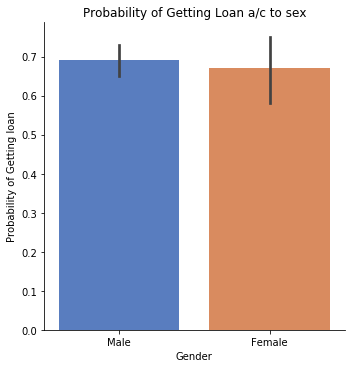

In [51]:
#Factor plot of Gender vs Loan Status
sns.factorplot(x="Gender", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to sex")
plt.ylabel("Probability of Getting loan")
plt.show()

Education vs Loan Status

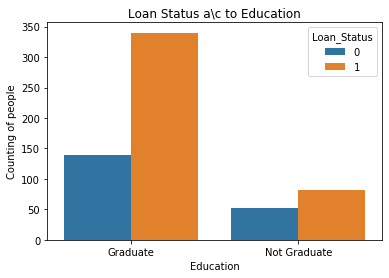

Education     Loan_Status
Graduate      1              340
              0              140
Not Graduate  1               82
              0               52
Name: Loan_Status, dtype: int64


In [52]:
sns.countplot(x="Education", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to Education")
plt.xlabel("Education")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Education')['Loan_Status'].value_counts())

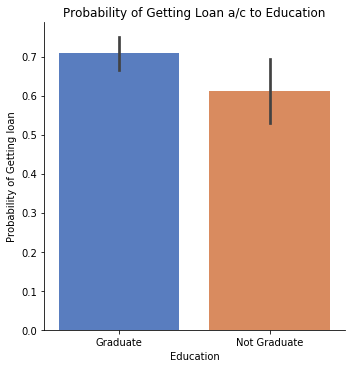

In [53]:
#Factor plot of Education vs Loan Status
sns.factorplot(x="Education", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to Education")
plt.ylabel("Probability of Getting loan")
plt.show()

Marital Status vs Loan status

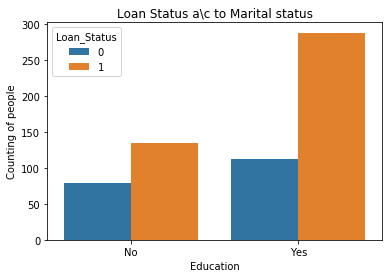

Married  Loan_Status
No       1              134
         0               79
Yes      1              288
         0              113
Name: Loan_Status, dtype: int64


In [54]:
sns.countplot(x="Married", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to Marital status")
plt.xlabel("Education")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Married')['Loan_Status'].value_counts())

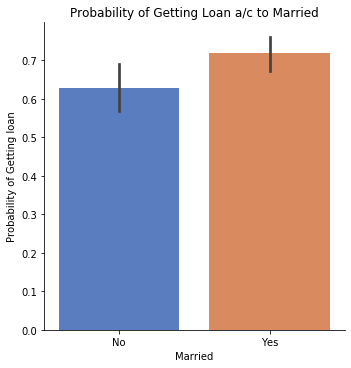

In [55]:
#Factor plot of Education vs Loan Status
sns.factorplot(x="Married", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to Married")
plt.ylabel("Probability of Getting loan")
plt.show()

Dependent vs Loan Status

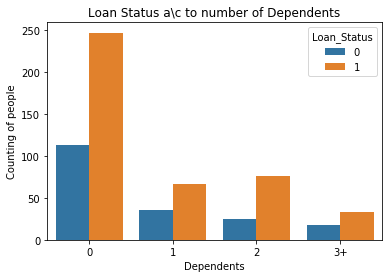

Dependents  Loan_Status
0           1              247
            0              113
1           1               66
            0               36
2           1               76
            0               25
3+          1               33
            0               18
Name: Loan_Status, dtype: int64


In [56]:
sns.countplot(x="Dependents", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to number of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Dependents')['Loan_Status'].value_counts())

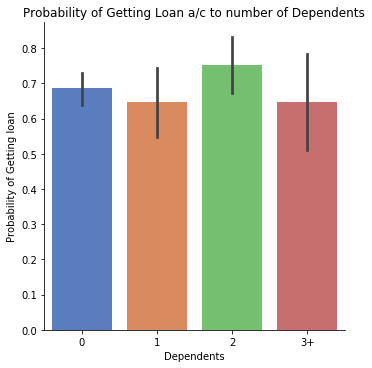

In [57]:
#Factor plot of Education vs Loan Status
sns.factorplot(x="Dependents", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to number of Dependents")
plt.ylabel("Probability of Getting loan")
plt.show()

Employment vs Loan Status

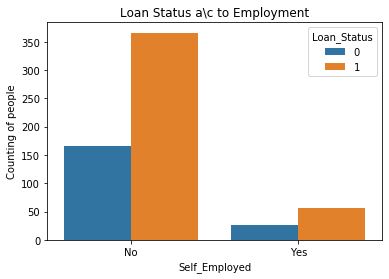

Self_Employed  Loan_Status
No             1              366
               0              166
Yes            1               56
               0               26
Name: Loan_Status, dtype: int64


In [58]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to Employment")
plt.xlabel("Self_Employed")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Self_Employed')['Loan_Status'].value_counts())

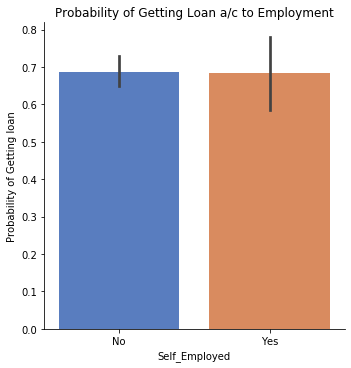

In [59]:
#Factor plot of Education vs Loan Status
sns.factorplot(x="Self_Employed", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to Employment")
plt.ylabel("Probability of Getting loan")
plt.show()

Property Area vs Loan Status

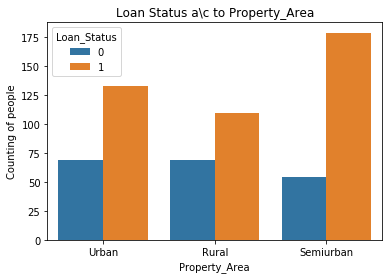

Property_Area  Loan_Status
Rural          1              110
               0               69
Semiurban      1              179
               0               54
Urban          1              133
               0               69
Name: Loan_Status, dtype: int64


In [60]:
sns.countplot(x="Property_Area", hue="Loan_Status", data=ds)
plt.title("Loan Status a\c to Property_Area")
plt.xlabel("Property_Area")
plt.ylabel("Counting of people")
plt.show()

print(ds.groupby('Property_Area')['Loan_Status'].value_counts())

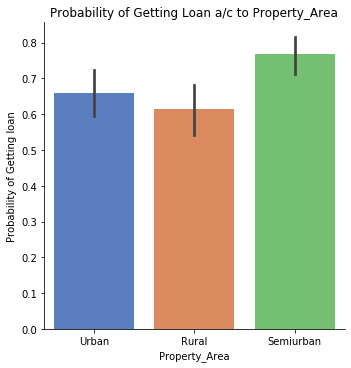

In [61]:
#Factor plot of Property Area vs Loan Status
sns.factorplot(x="Property_Area", y="Loan_Status", data=ds, kind="bar", size=5, palette="muted", aspect=1)
plt.title("Probability of Getting Loan a/c to Property_Area")
plt.ylabel("Probability of Getting loan")
plt.show()

<Figure size 576x288 with 0 Axes>

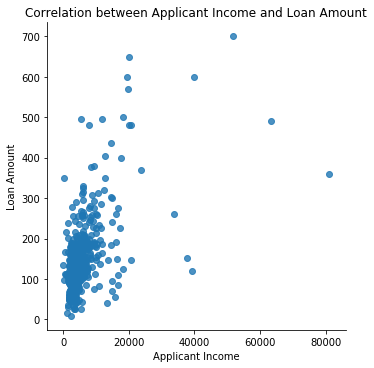

In [63]:
#Scatter plot between Applicant Income and Loan Amount
plt.figure(figsize=(8,4))
sns.lmplot(x="ApplicantIncome", y="LoanAmount", fit_reg=False, data=ds)
plt.title("Correlation between Applicant Income and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

# Multivariate Analysis

<Figure size 576x288 with 0 Axes>

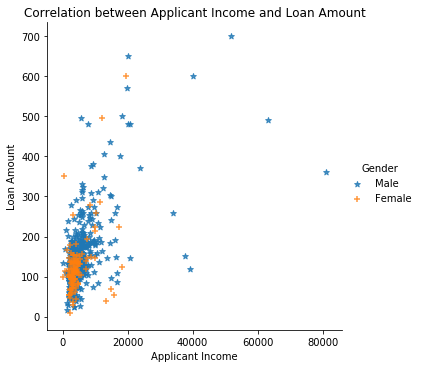

In [65]:
#Scatter plot between Applicant Income and Loan Amount
plt.figure(figsize=(8,4))
sns.lmplot(x="ApplicantIncome", y="LoanAmount", fit_reg=False, data=ds, hue='Gender', markers=['*','+'])
plt.title("Correlation between Applicant Income and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

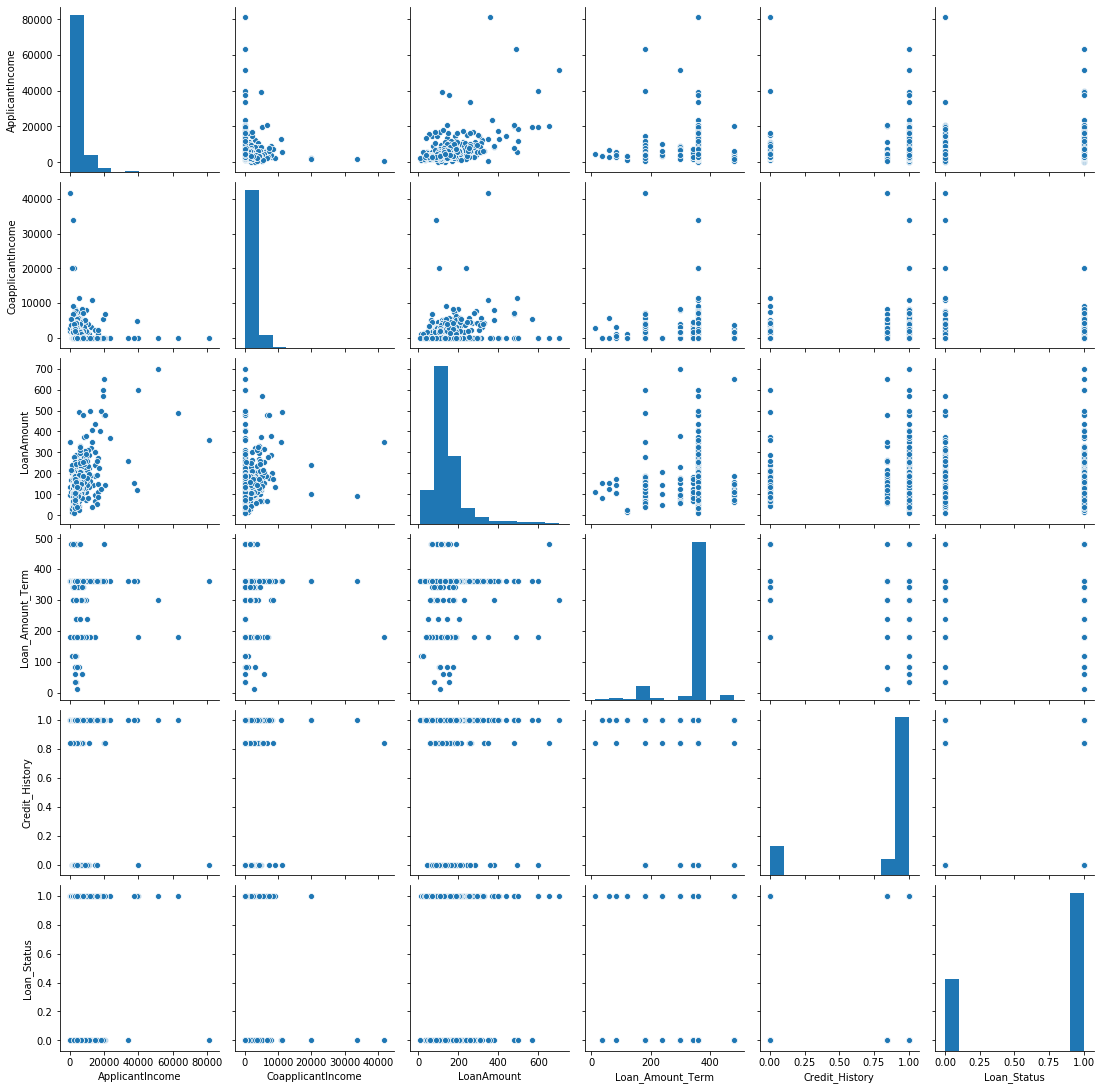

In [66]:
sns.pairplot(ds)

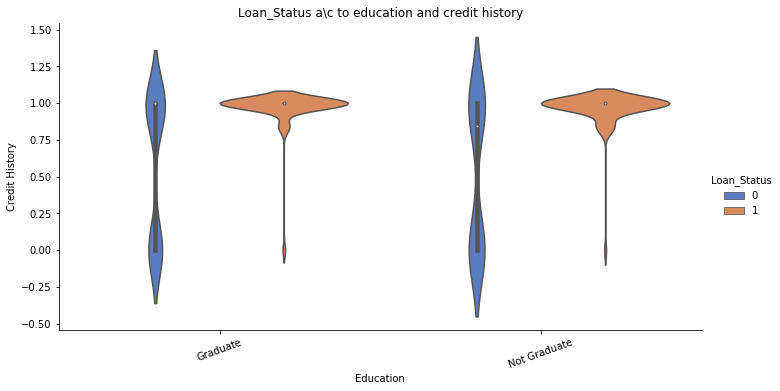

In [70]:
sns.factorplot(x="Education", y="Credit_History", hue='Loan_Status', data=ds, kind="violin", size=5, palette="muted", aspect=2)
plt.title("Loan_Status a\c to education and credit history")
plt.xticks(rotation=20)
plt.ylabel("Credit History")
plt.show()

In [79]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

# Checking Skewness

In [77]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [80]:
ds.describe().columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

# To check the distribution of skewness

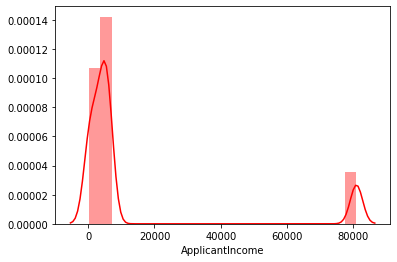

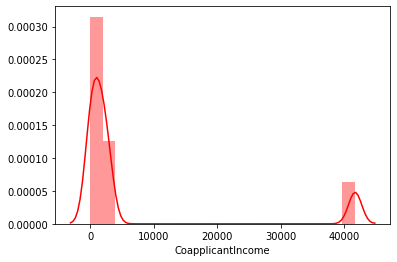

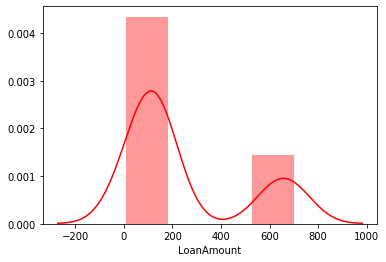

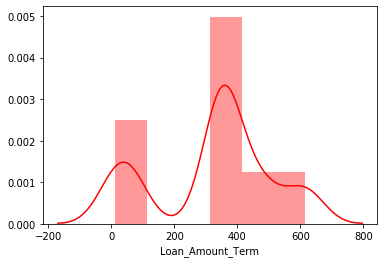

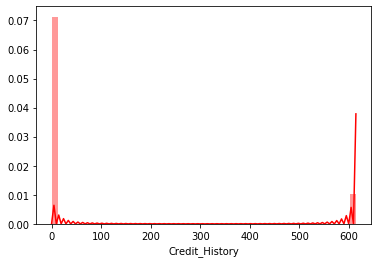

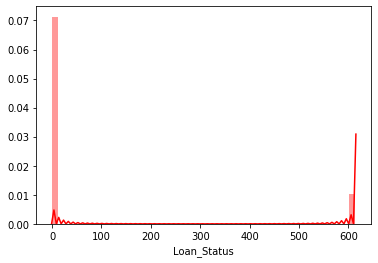

In [84]:
for col in ds.describe().columns:
    sns.distplot(ds.describe()[col], color='r')
    plt.show()

In [85]:
ds.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [89]:
#Treating skewness via square root method
ds.skew()
for col in ds.skew().index:
    if col in ds.describe().columns:
        if ds[col].skew()>0.55:
            ds[col]=np.sqrt(ds[col])
        if ds[col].skew()<-0.55:
            ds[col]=np.cbrt(ds[col])

In [90]:
ds.skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
Loan_Amount_Term    -3.573315
Credit_History      -2.014285
Loan_Status         -0.809998
dtype: float64

# Changing the categorical variables into numeric variable

In [91]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in ds.columns:
    if ds[column].dtype==np.number:
        continue
    ds[column]=le.fit_transform(ds[column])

In [92]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2,1.0


# Plotting Outliers

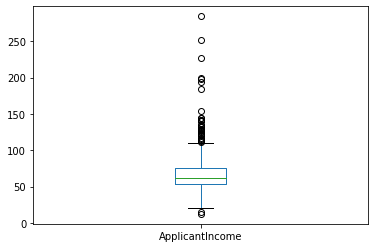

In [93]:
ds['ApplicantIncome'].plot.box()

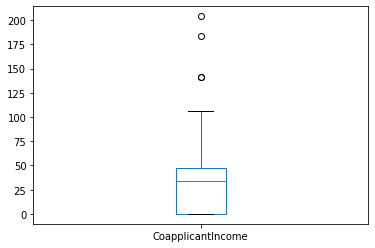

In [94]:
ds['CoapplicantIncome'].plot.box()

# Removing Outliers

In [95]:
from scipy.stats import zscore
z=np.abs(zscore(ds))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42650477, 0.04760721,
        1.48253724]])

In [96]:
thresholds=3
print(np.where(z>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 487,
       495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8, 8, 7,
       6, 7, 6, 8, 9, 9, 8, 8, 9, 8, 9, 7, 9, 7, 8], dtype=int64))


In [97]:
ds_new=ds[(z<3).all(axis=1)]

In [98]:
print(ds.shape, '\t\t', ds_new.shape)

(614, 13) 		 (580, 13)


In [103]:
ds=ds_new

In [104]:
df=ds

In [105]:
df.shape

(580, 13)

All outliers are removed

# Model Training

In [106]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2,1.0


In [108]:
#Splittingthe data into input and output variable
x=df.drop(columns=['Loan_Status'], axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2


In [109]:
y=df['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

In [110]:
#Checking shape

print(x.shape, '\t\t', y.shape)

(580, 12) 		 (580,)


In [111]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [112]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [113]:
#Checking the shape

print(x_train.shape, '\t\t', x_test.shape)

(464, 12) 		 (116, 12)


In [114]:
#Checking the shape

print(y_train.shape, '\t\t', y_test.shape)

(464,) 		 (116,)


In [115]:
#Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [118]:
#All Algorithm by using for loop

model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of' , m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('*********************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116

*********************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
 

In [119]:
#Cross validating the models

models=model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y, cv=15, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard deviation:", score.std())
    print('*********************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.82051282 0.82051282 0.79487179 0.79487179 0.79487179 0.79487179
 0.74358974 0.79487179 0.82051282 0.84615385 0.89473684 0.84210526
 0.73684211 0.92105263 0.84210526]
Mean Score: 0.8174988753936122
Standard deviation: 0.04710016963936306
*********************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.82051282 0.82051282 0.79487179 0.79487179 0.79487179 0.79487179
 0.74358974 0.79487179 0.82051282 0.84615385 0.89473684 0.84210526
 0.71052632 0.92105263 0.84210526]
Mean Score: 0.8157444894286999
Standard deviation: 0.05044325894145981
*************************************************

From above models Logistic regression, SVC and GaussianNB gives the best score

we use grid search cv to find the best prameters and check the score and after that we finalized our model.

# Using GridSearchCV to find out the best parameters in Logistic Regression

In [120]:
from sklearn.model_selection import GridSearchCV

parameters={'C':[1, 10], 'random_state':range(42, 100)}
lg=LogisticRegression()

clf=GridSearchCV(lg, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [122]:
#Logistic regression with best parameters

lr=LogisticRegression(C=1, random_state=42)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116



In [123]:
#cross validate logistic regression

score=cross_val_score(lr, x, y, cv=5, scoring='accuracy')

print(score)
print('Mean:', score.mean())
print('Std:', score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.8362069 ]
Mean: 0.8172413793103448
Std: 0.02853956096077041


# Using gridsearchCV to find out the best parameter in SVM

In [124]:
from sklearn.model_selection import GridSearchCV

parameters={'kernel' :('linear', 'rbf', 'sigmoid'), 'C':[1, 10], 'random_state':range(42,60)}
sv=SVC()

clf=GridSearchCV(sv, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear', 'random_state': 42}


In [126]:
#SVM with best parameters

sv=SVC(kernel='linear', C=1, random_state=42, probability=True)
sv.fit(x_train, y_train)
sv.score(x_train, y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test, predsv))

0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116



In [127]:
#cross validate logistic regression

score=cross_val_score(sv, x, y, cv=5, scoring='accuracy')

print(score)
print('Mean:', score.mean())
print('Std:', score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.8362069 ]
Mean: 0.8172413793103448
Std: 0.02853956096077041


# GaussianNB

In [129]:
#GaussianNB

gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)
predgnb=sv.predict(x_test)
print(accuracy_score(y_test, predgnb))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116



In [130]:
#cross validate GaussianNB

score=cross_val_score(gnb, x, y, scoring='accuracy')

print(score)
print('Mean:', score.mean())
print('Std:', score.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.81034483]
Mean: 0.8120689655172413
Std: 0.026931895434160864


Among all the models GaussianNB gives highest score so we adopt GaussianNb as our final model.

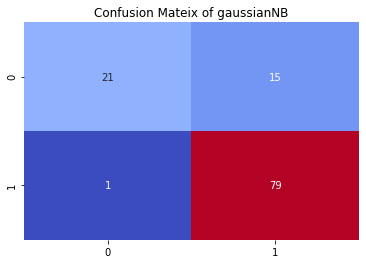

In [131]:
#Plotting confusion matrix for GaussianNB
cm=confusion_matrix(y_test, predgnb)
sns.heatmap(cm, annot=True, cbar=False, cmap='coolwarm')

plt.title("Confusion Mateix of gaussianNB")
plt.show()

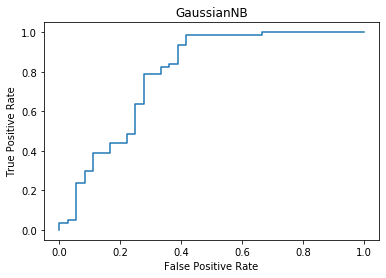

0.7854166666666667


In [136]:
#Auc Roc curve and finding auc score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="GaussianNB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

auc_score=roc_auc_score(y_test, predgnb)
print(auc_score)

In [137]:
#saving the Gaussian Model
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(gnb, 'Fraud_loan_gnb.pkl')

['Fraud_loan_gnb.pkl']